In [1]:
#picking for 10 random images from folder
import os
import random
import cv2
import matplotlib.pyplot as plt


In [3]:
normal_path = r"\Users\Shiva kumar\OneDrive\Desktop\Stage-1-Basic-Logic-Building\pydicom\archive\no"
pneumonia_path = r"\Users\Shiva kumar\OneDrive\Desktop\Stage-1-Basic-Logic-Building\pydicom\archive\yes"


In [6]:
# Get all image names from the folders
normal_images = os.listdir(normal_path)
pneumonia_images = os.listdir(pneumonia_path)

# Pick 5 random images from each
normal_samples = random.sample(normal_images, 10)
pneumonia_samples = random.sample(pneumonia_images, 10)

print("Random Normal Images:", normal_samples)
print("Random Pneumonia Images:", pneumonia_samples)


Random Normal Images: ['no 100.jpg', '32 no.jpg', '38 no.jpg', 'N19.JPG', '27 no.jpg', 'N6.jpg', '17 no.jpg', 'N26.JPG', '6 no.jpg', '33 no.jpg']
Random Pneumonia Images: ['Y164.JPG', 'Y65.JPG', 'Y166.JPG', 'Y32.jpg', 'Y247.JPG', 'Y17.jpg', 'Y29.jpg', 'Y195.JPG', 'Y112.JPG', 'Y81.jpg']


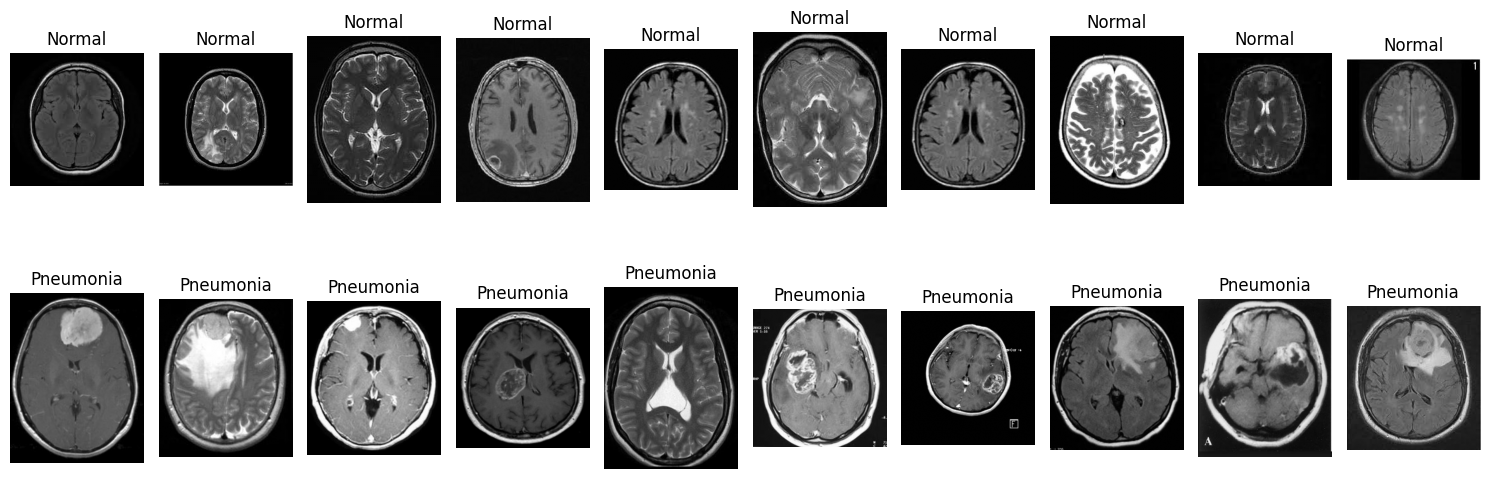

In [8]:
fig, axes = plt.subplots(2, 10, figsize=(15, 6))

# Show 5 normal images
for i, img_name in enumerate(normal_samples):
    img = cv2.imread(os.path.join(normal_path, img_name), cv2.IMREAD_GRAYSCALE)
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title("Normal")
    axes[0, i].axis('off')

# Show 5 pneumonia images
for i, img_name in enumerate(pneumonia_samples):
    img = cv2.imread(os.path.join(pneumonia_path, img_name), cv2.IMREAD_GRAYSCALE)
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title("Pneumonia")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#1. Load and Display Multiple Images Side by Side
import cv2
import matplotlib.pyplot as plt
import os
import random

# Paths to your dataset folders
normal_path = r"\Users\Shiva kumar\OneDrive\Desktop\Stage-1-Basic-Logic-Building\pydicom\archive\no"
pneumonia_path =r"\Users\Shiva kumar\OneDrive\Desktop\Stage-1-Basic-Logic-Building\pydicom\archive\yes"

# Pick random images from each folder
normal_imgs = random.sample(os.listdir(normal_path), 3)
pneumonia_imgs = random.sample(os.listdir(pneumonia_path), 3)

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Show 3 normal images
for i, img_name in enumerate(normal_imgs):
    img = cv2.imread(os.path.join(normal_path, img_name), cv2.IMREAD_GRAYSCALE)
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title("Normal")
    axes[0, i].axis('off')

# Show 3 pneumonia images
for i, img_name in enumerate(pneumonia_imgs):
    img = cv2.imread(os.path.join(pneumonia_path, img_name), cv2.IMREAD_GRAYSCALE)
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title("Pneumonia")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

'''Top row → normal lungs → usually clearer, no cloudy regions.

Bottom row → pneumonia → blurred, white patches, fluid buildup.'''


2.Compare Histogram Patterns.
Medical images often differ in pixel intensity distributions.
A histogram shows how dark or bright pixels are distributed — great for comparison.



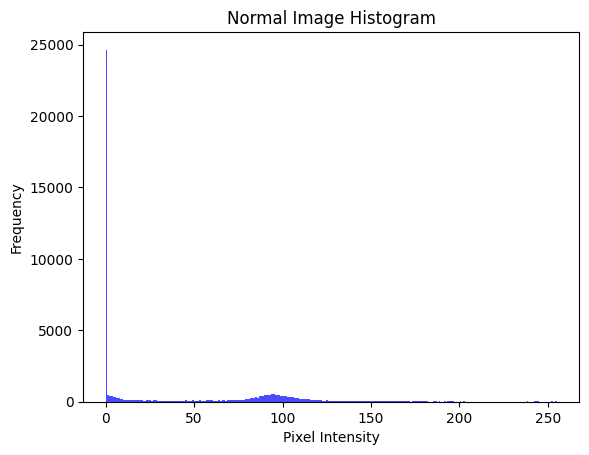

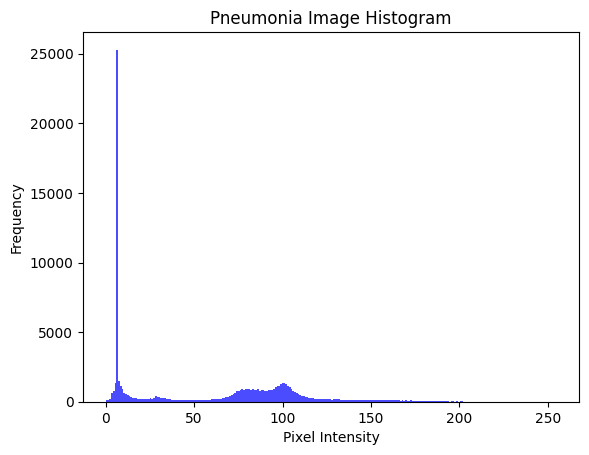

In [13]:
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Load one sample normal and pneumonia image
normal_img = cv2.imread(os.path.join(normal_path, normal_imgs[0]), cv2.IMREAD_GRAYSCALE)
pneumonia_img = cv2.imread(os.path.join(pneumonia_path, pneumonia_imgs[0]), cv2.IMREAD_GRAYSCALE)

plot_histogram(normal_img, "Normal Image Histogram")
plot_histogram(pneumonia_img, "Pneumonia Image Histogram")

'''Normal X-rays → smooth histogram, balanced brightness.

Pneumonia X-rays → more bright pixel peaks due to infections.'''


In [15]:
def image_sharpness(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

normal_sharp = image_sharpness(normal_img)
pneumonia_sharp = image_sharpness(pneumonia_img)

print("Normal Image Sharpness:", normal_sharp)
print("Pneumonia Image Sharpness:", pneumonia_sharp)

''' Higher value → sharper image.

If pneumonia images are blurrier, they may need contrast enhancement.'''


Normal Image Sharpness: 1252.859649122807
Pneumonia Image Sharpness: 432.77616404906064


' Higher value → sharper image.\n\nIf pneumonia images are blurrier, they may need contrast enhancement.'

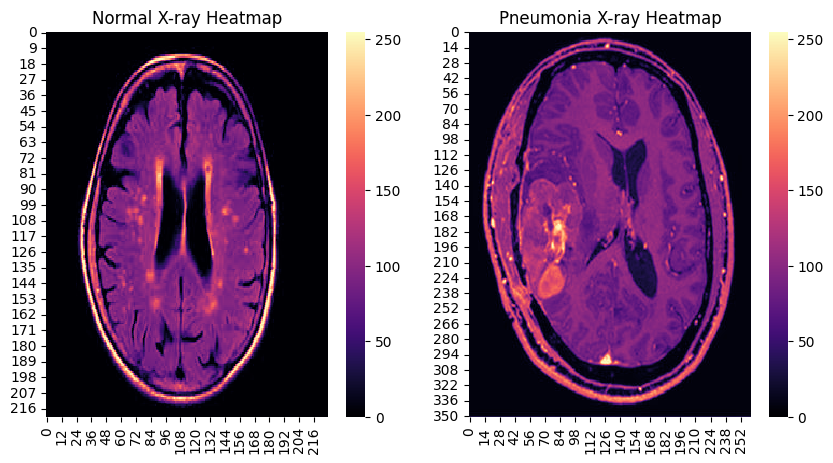

In [12]:
import seaborn as sns
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.heatmap(normal_img, cmap="magma")
plt.title("Normal X-ray Heatmap")

plt.subplot(1,2,2)
sns.heatmap(pneumonia_img, cmap="magma")
plt.title("Pneumonia X-ray Heatmap")

plt.show()


'''Pneumonia images will have bright hot spots (white patches → infections).

Normal images look uniformly dark.'''
